# E-Commerce Customer Churn Prediction

In [2]:
from pyforest                      import *
from feature_engine.outliers       import Winsorizer
from sklearn.model_selection       import train_test_split
from sklearn.feature_selection     import SelectKBest, f_classif
from sklearn.preprocessing         import MinMaxScaler, StandardScaler
from sklearn.preprocessing         import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline              import make_pipeline
from sklearn.compose               import ColumnTransformer
from sklearn.metrics               import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/ASUS/kode/Projek/E-Commerce Customer Churn Prediction/e-commerce_churn_indo.csv')
df

<IPython.core.display.Javascript object>

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,4/5/2017,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,3/31/2017,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2/11/2017,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,12/23/2015,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,3/20/2015,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,3/5/2015,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,1/15/2017,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,7/11/2015,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,5/25/2016,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        37010 non-null  object 
 1   usia                           37010 non-null  int64  
 2   jenis_kelamin                  36951 non-null  object 
 3   kategori_wilayah               31579 non-null  object 
 4   kategori_membership            37010 non-null  object 
 5   tanggal_bergabung              37010 non-null  object 
 6   bergabung_melalui_referral     31568 non-null  object 
 7   jenis_penawaran_preferensi     36722 non-null  object 
 8   medium_operasi                 31615 non-null  object 
 9   pilihan_internet               37010 non-null  object 
 10  waktu_kunjungan_terakhir       37010 non-null  object 
 11  hari_sejak_login_terakhir      37010 non-null  int64  
 12  rata_rata_waktu_dihabiskan     37010 non-null 

#### Missing Value

In [5]:
df.isnull().sum()

user_id                             0
usia                                0
jenis_kelamin                      59
kategori_wilayah                 5431
kategori_membership                 0
tanggal_bergabung                   0
bergabung_melalui_referral       5442
jenis_penawaran_preferensi        288
medium_operasi                   5395
pilihan_internet                    0
waktu_kunjungan_terakhir            0
hari_sejak_login_terakhir           0
rata_rata_waktu_dihabiskan          0
rata_rata_nilai_transaksi           0
rata_rata_hari_login                0
poin_di_dompet                      0
menggunakan_diskon_khusus           0
preferensi_aplikasi_penawaran       0
keluhan_terdahulu                   0
status_keluhan                      0
umpan_balik                         0
churn_risk_score                    0
dtype: int64

lumayan banyak missing valuenya, tpi rata-rata 5000 baris data. khususnya pada fitur yang kategorikal. maka kita bisa coba untuk  pisahin kolom numerikal dan kategorikal

In [6]:
df_copy = df.copy()

num_columns = df_copy.select_dtypes(include=np.number).columns.tolist() #jadi list arr
kat_columns = df_copy.select_dtypes(include=['object']).columns.tolist()

<IPython.core.display.Javascript object>

In [7]:
num_columns

['usia',
 'hari_sejak_login_terakhir',
 'rata_rata_waktu_dihabiskan',
 'rata_rata_nilai_transaksi',
 'rata_rata_hari_login',
 'poin_di_dompet',
 'churn_risk_score']

In [8]:
num_columns.remove('churn_risk_score')

In [9]:
df_num = df[num_columns]
df_num

,usia,hari_sejak_login_terakhir,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet
0,29,4,1184.490000,38604.69,10.0,627.48
1,50,11,338.150000,7665.66,17.0,575.97
2,26,8,235.140000,37671.69,5.0,767.93
3,63,10,56.670000,15678.14,11.0,590.22
4,64,9,153.990000,8422.68,0.0,722.04
...,...,...,...,...,...,...
37005,36,15,199.330000,29455.29,9.0,846.52
37006,27,15,368.500000,27038.47,8.0,835.98
37007,20,13,272.130000,39305.35,27.0,714.90
37008,38,-999,65.070000,46108.73,6.0,744.99


In [10]:
kat_columns

['user_id',
 'jenis_kelamin',
 'kategori_wilayah',
 'kategori_membership',
 'tanggal_bergabung',
 'bergabung_melalui_referral',
 'jenis_penawaran_preferensi',
 'medium_operasi',
 'pilihan_internet',
 'waktu_kunjungan_terakhir',
 'menggunakan_diskon_khusus',
 'preferensi_aplikasi_penawaran',
 'keluhan_terdahulu',
 'status_keluhan',
 'umpan_balik']

Karena data missing values tersebut mungkin disebut dengan 'Missing at Random (MAR)'. Jadi aku nggak tahu kenapa datanya bisa hilang secara random. Jadi solusinya kita impute dengan nan

In [11]:
df = df.fillna({'jenis_kelamin': 'Unknown',
               'kategori_wilayah': 'Unknown',
               'bergabung_melalui_referral': 'Unknown',
               'jenis_penawaran_preferensi': 'Unknown',
               'medium_operasi': 'Unknown'})

In [12]:
df.isnull().sum()

user_id                          0
usia                             0
jenis_kelamin                    0
kategori_wilayah                 0
kategori_membership              0
tanggal_bergabung                0
bergabung_melalui_referral       0
jenis_penawaran_preferensi       0
medium_operasi                   0
pilihan_internet                 0
waktu_kunjungan_terakhir         0
hari_sejak_login_terakhir        0
rata_rata_waktu_dihabiskan       0
rata_rata_nilai_transaksi        0
rata_rata_hari_login             0
poin_di_dompet                   0
menggunakan_diskon_khusus        0
preferensi_aplikasi_penawaran    0
keluhan_terdahulu                0
status_keluhan                   0
umpan_balik                      0
churn_risk_score                 0
dtype: int64

#### Duplicated data

In [13]:
# dupe
df.duplicated().sum()

18

terdapat 18 record data yang duplikat, kita langsung hapus aja

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
# statistik
df.describe()

,usia,hari_sejak_login_terakhir,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


terlihat bahwa dari beberapa fitur numerikal diatas sepertinya ada outlier di transaksi, dan minus yang perlu diobservasi dengan visualisasi

#### Observ Data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

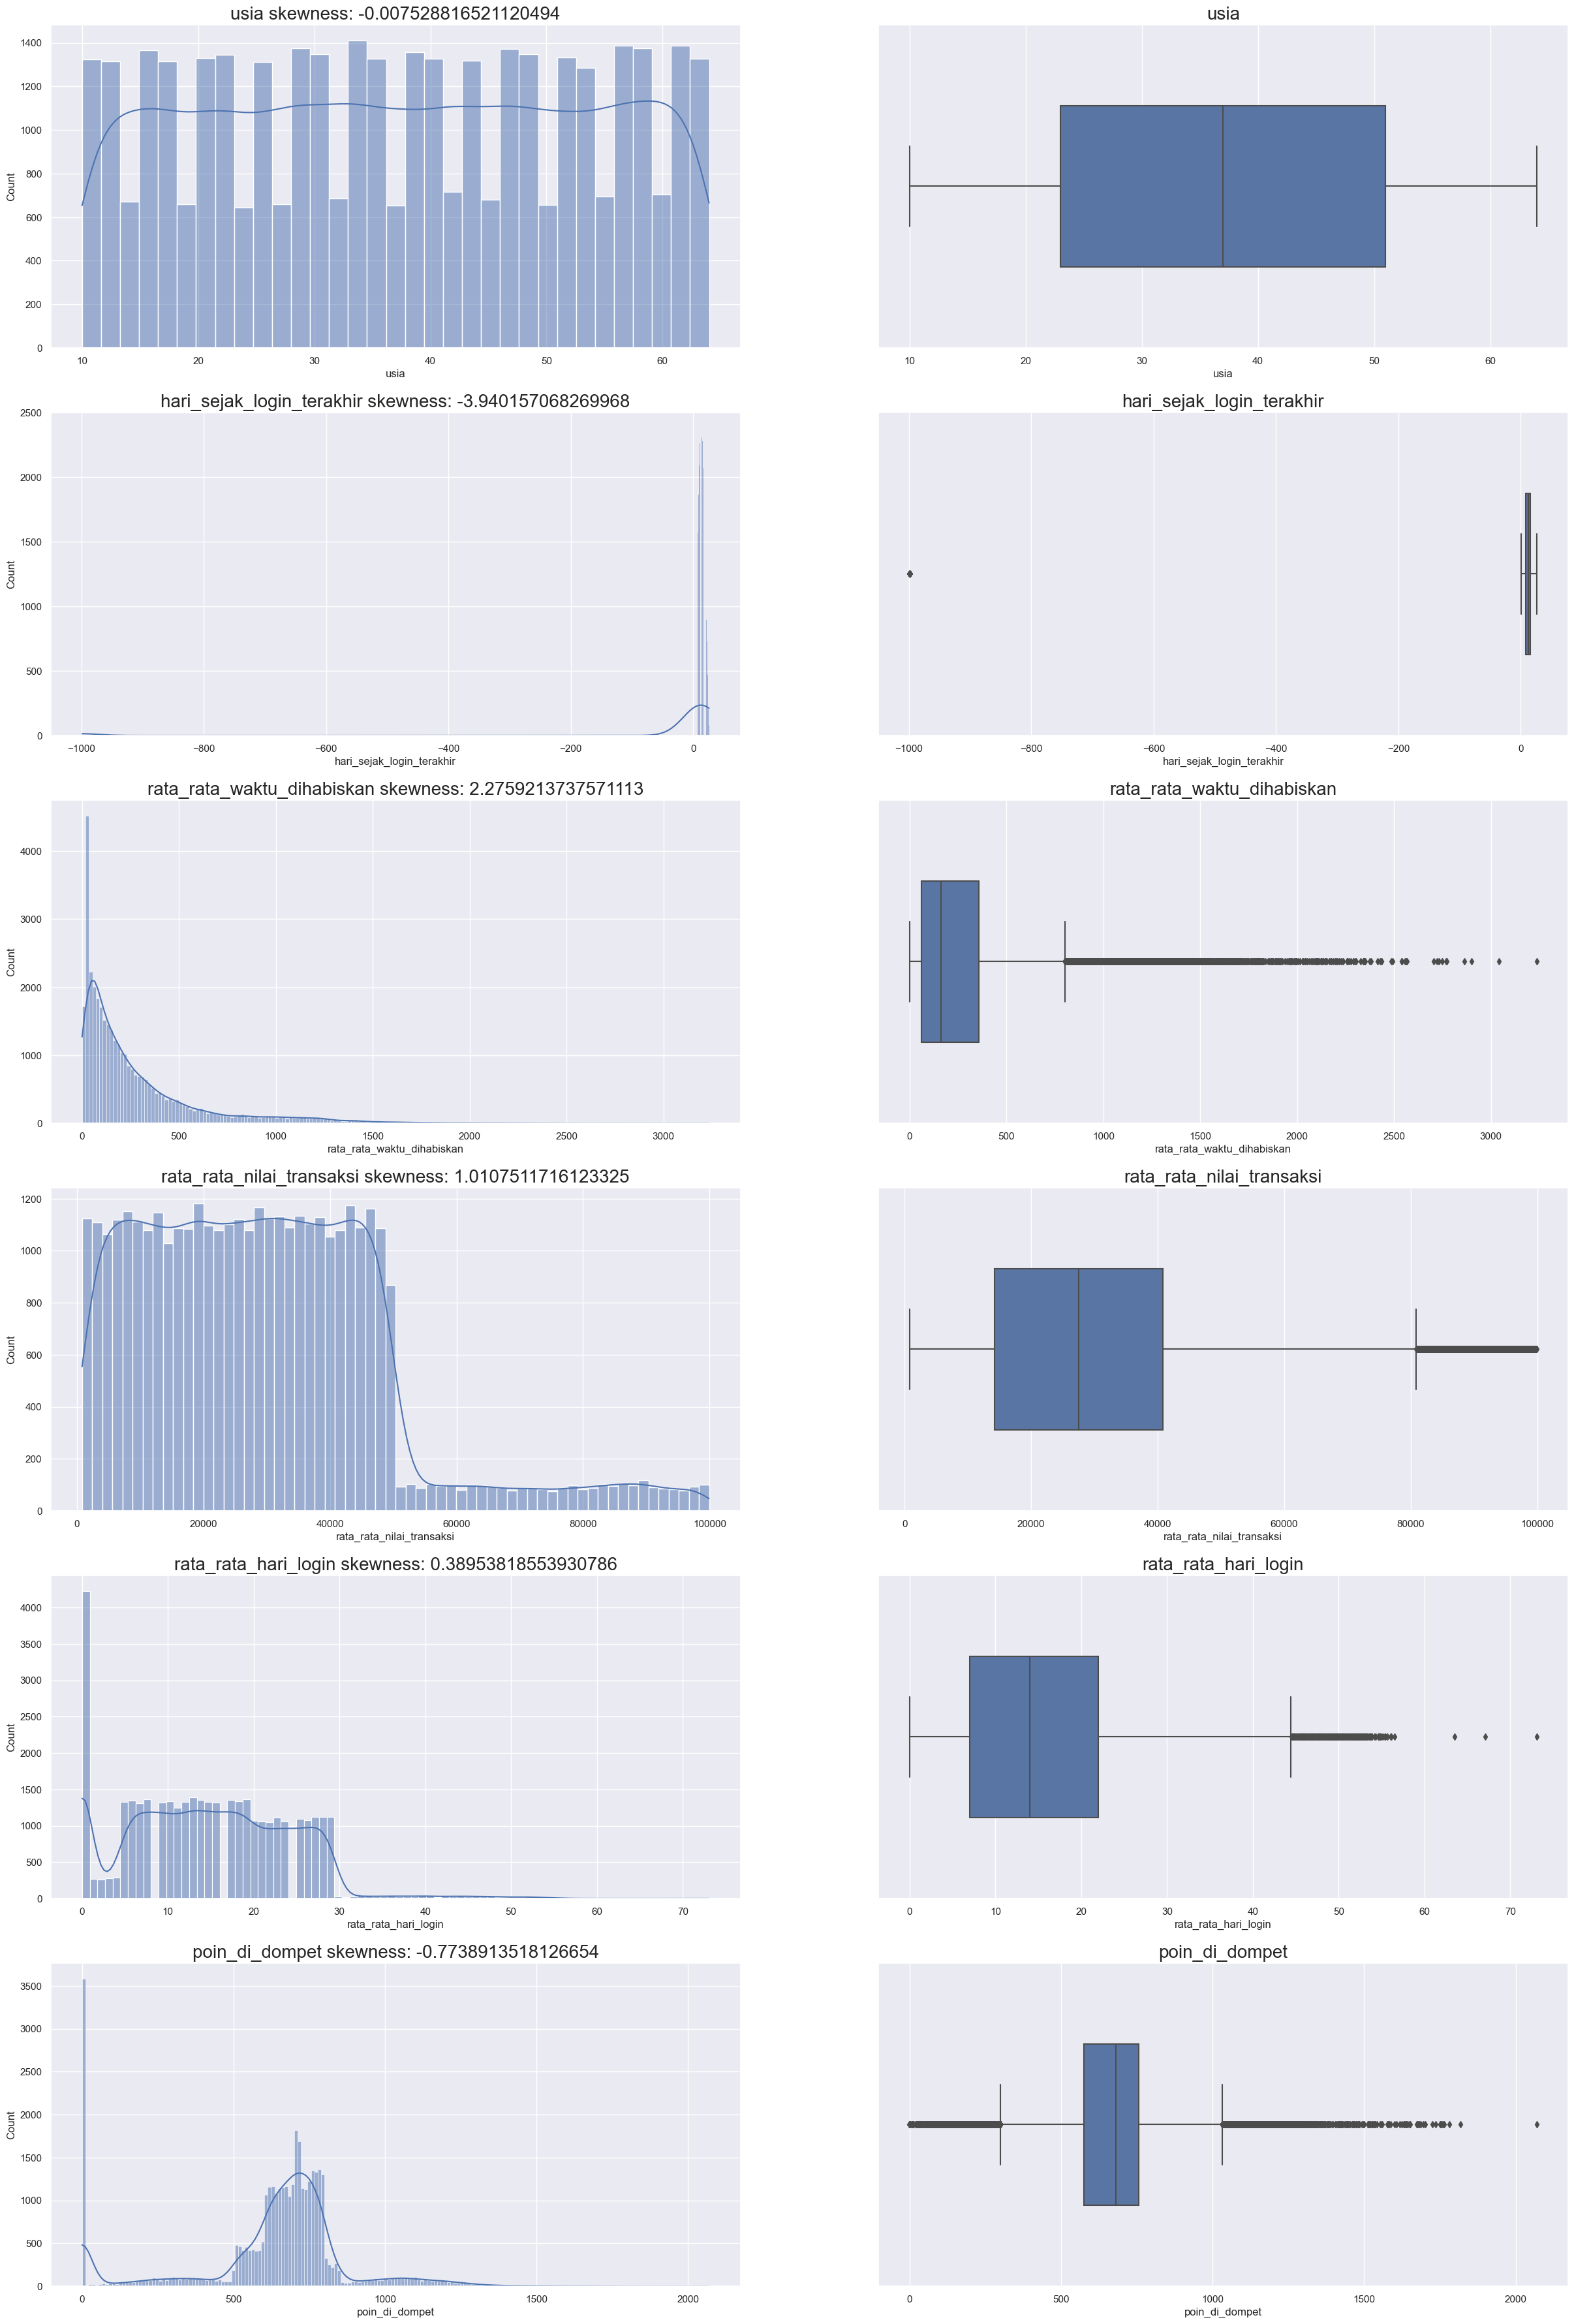

In [17]:
n = len(df_num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30,45))

for i in range(n):
    col = df_num.columns[i]
    sns.histplot(ax=ax[i,0],data=df_num[col],kde=True)
    ax[i,0].set_title(f'{col} skewness: {df_num[col].skew()}', fontsize=20)
    sns.boxplot(ax=ax[i,1],data=df_num,x=df_num[col],width=0.50)
    ax[i,1].set_title(col, fontsize=20)

Berdasarkan hasil visualisasi tersebut. Kita menemukan beberapa data yang terindikasi skewness atau condong entah ke kiri atau kanan atau arah lainnya. Lalu ada juga yang outlier. Sehingga perlu kita atasi yang mengalammi skewness dengan scaling entah itu dengan standardscaler atau dengan log.

In [18]:
def condong(col):
    condong = df[col].skew()
    
    if condong >= -0.5 and condong <= 0.5:
        print(f'Distribusi dari {col} adalah normal')
    elif condong <= -0.5:
        print(f'Distribusi dari {col} adalah skew ke kiri')
    else:
        print(f'Distribusi dari {col} adalah skew ke kanan')

In [19]:
n = len(df_num.columns)

for i in range(n):
    col = df_num.columns[i]
    condong(col)

Distribusi dari usia adalah normal
Distribusi dari hari_sejak_login_terakhir adalah skew ke kiri
Distribusi dari rata_rata_waktu_dihabiskan adalah skew ke kanan
Distribusi dari rata_rata_nilai_transaksi adalah skew ke kanan
Distribusi dari rata_rata_hari_login adalah normal
Distribusi dari poin_di_dompet adalah skew ke kiri


Data yang normal itu akan diterapkan standardscaler untuk mengatasi jomplangnya perbedaan data. Namun untuk data yang skew itu akan diterapkan teknik feaature scaling dengan MinMaxScaler.

#### Outlier
Cara menangani outlier

Cara handlingnya yaitu kita ubah data outlier yang lebih besar dari Maximum itu supaya sama atau menjadi dengan nilai Maximum:
#### (Q3 + 1.5 * IQR)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

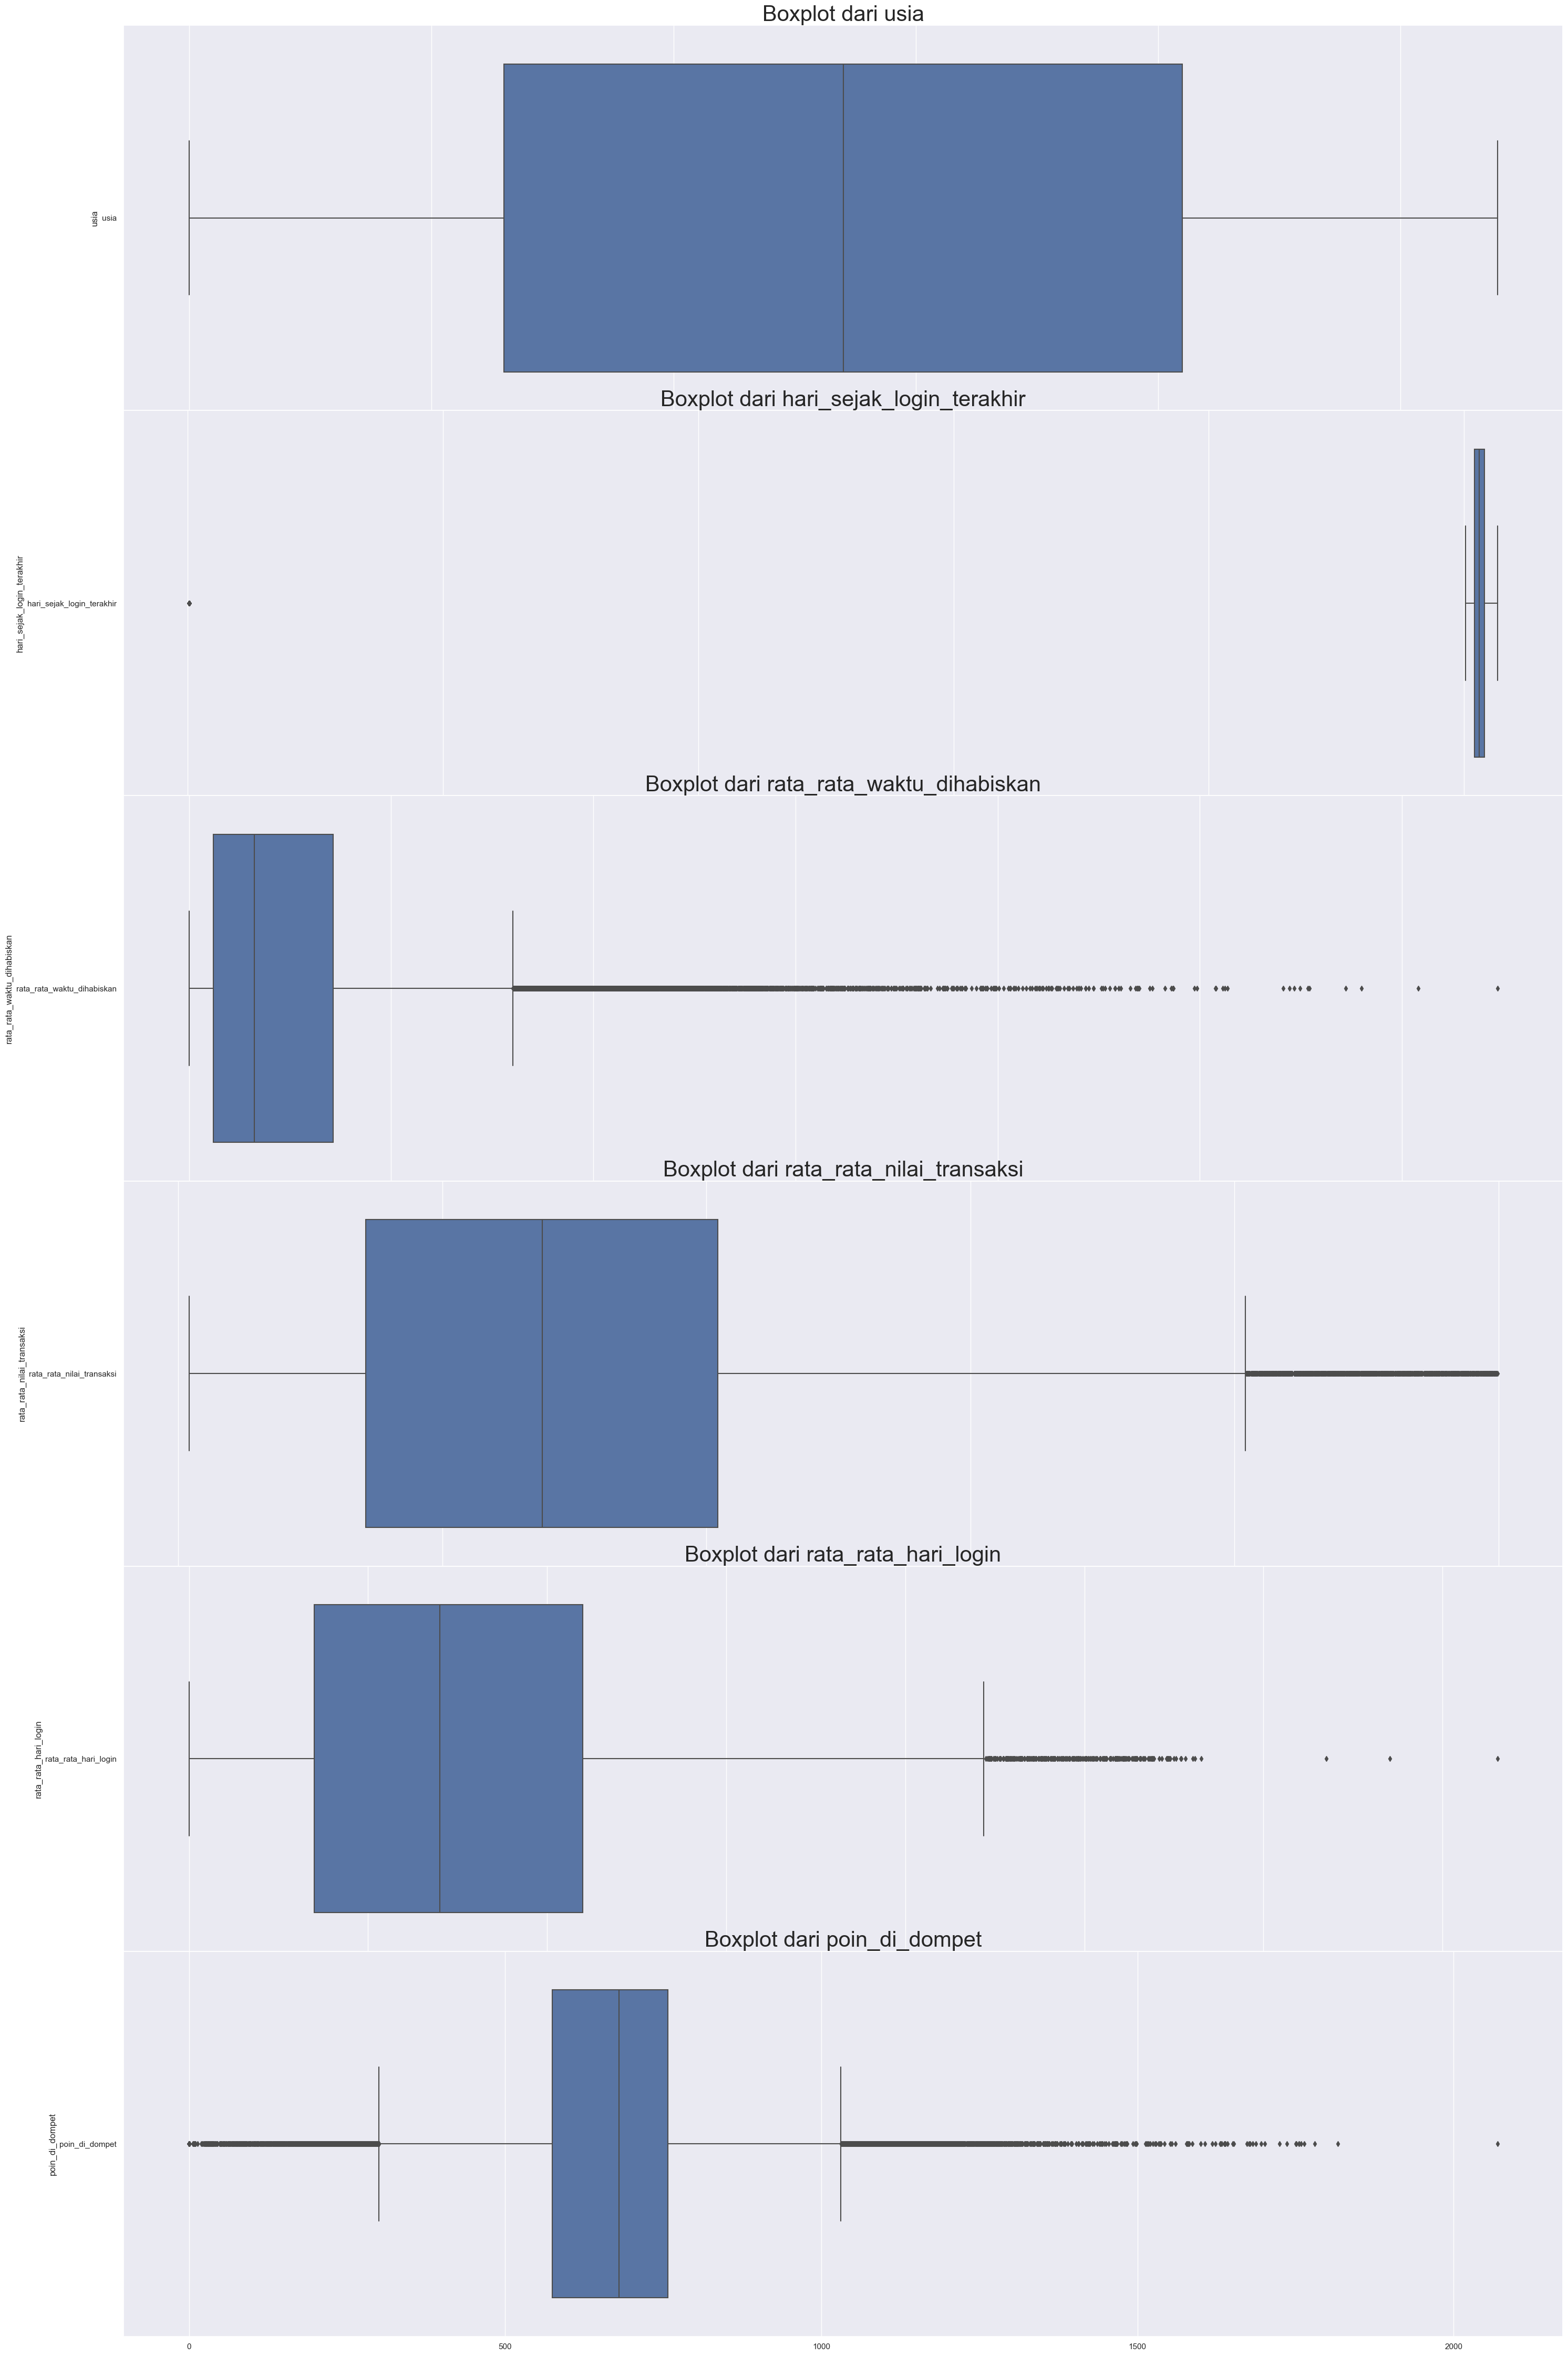

In [20]:
# lihat terlebih dahulu yang outlier pada numerikal kolom

n = len(df_num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n, 1, figsize=(30, 45), gridspec_kw={'hspace': 0})

for i, col in enumerate(df_num.columns):
    sns.boxplot(ax=ax[i], data=df_num[[col]], orient='h')
    ax[i].set_title(f'Boxplot dari {col}', fontsize=30)
    ax[i].set_ylabel(col)
    
fig.tight_layout()

#### Handling Outliers with max IQR
Kita akan mencari data yang outlier, lalu mengatasinya dengan Winsorizer yang mengubah data outlier dengan lower atau upper bound.

In [21]:
def cari_outlier(col):
    condong = df_num.skew()

    # handling 1
    if (condong >= -0.5).all() and (condong <= 0.5).all():
        upper = df[col].mean() + 3 * df[col].std()
        lower = df[col].mean() - 3 * df[col].std()
    
    else:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
    
    tidak_outlier = df[(df[col]>=lower) & (df[col]<=upper)]
    outliers = df[(df[col]>upper) | (df[col]<lower)]
    
    return upper, lower, tidak_outlier, outliers

In [22]:
num = df_num
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    up, low, tidak_out, out = cari_outlier(col)
    print(f'Kolom: {col}')
    print('Jumlah outlier: ', len(out))
    print('-'*40)

Kolom: usia
Jumlah outlier:  0
----------------------------------------
Kolom: hari_sejak_login_terakhir
Jumlah outlier:  1999
----------------------------------------
Kolom: rata_rata_waktu_dihabiskan
Jumlah outlier:  3108
----------------------------------------
Kolom: rata_rata_nilai_transaksi
Jumlah outlier:  1131
----------------------------------------
Kolom: rata_rata_hari_login
Jumlah outlier:  261
----------------------------------------
Kolom: poin_di_dompet
Jumlah outlier:  6686
----------------------------------------


Terdapat sekitar puluhan ribu data yang terindikasi outlier. Sehingga kita akan mengganti outlier-outlier tersebut menjadi data yang Maximum atau Minimum dengan menggunakan Winsorizer dengan menggunakan iqr untuk mempersingkat waktu jika koding secara manual

In [23]:
ws = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
ws.fit(df)
df = ws.transform(df)

In [24]:
df

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik,churn_risk_score
0,9f420209e7d129f3,29,F,Unknown,No Membership,4/5/2017,Yes,Without Offers,Unknown,Wi-Fi,...,801.13375,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,Unknown,Basic Membership,3/31/2017,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2/11/2017,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,...,235.14000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,12/23/2015,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,3/20/2015,Unknown,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,3/5/2015,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,...,199.33000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,1/15/2017,Yes,Without Offers,Desktop,Wi-Fi,...,368.50000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,Unknown,Gold Membership,7/11/2015,Yes,Without Offers,Unknown,Mobile_Data,...,272.13000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,5/25/2016,Yes,Without Offers,Desktop,Wi-Fi,...,65.07000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

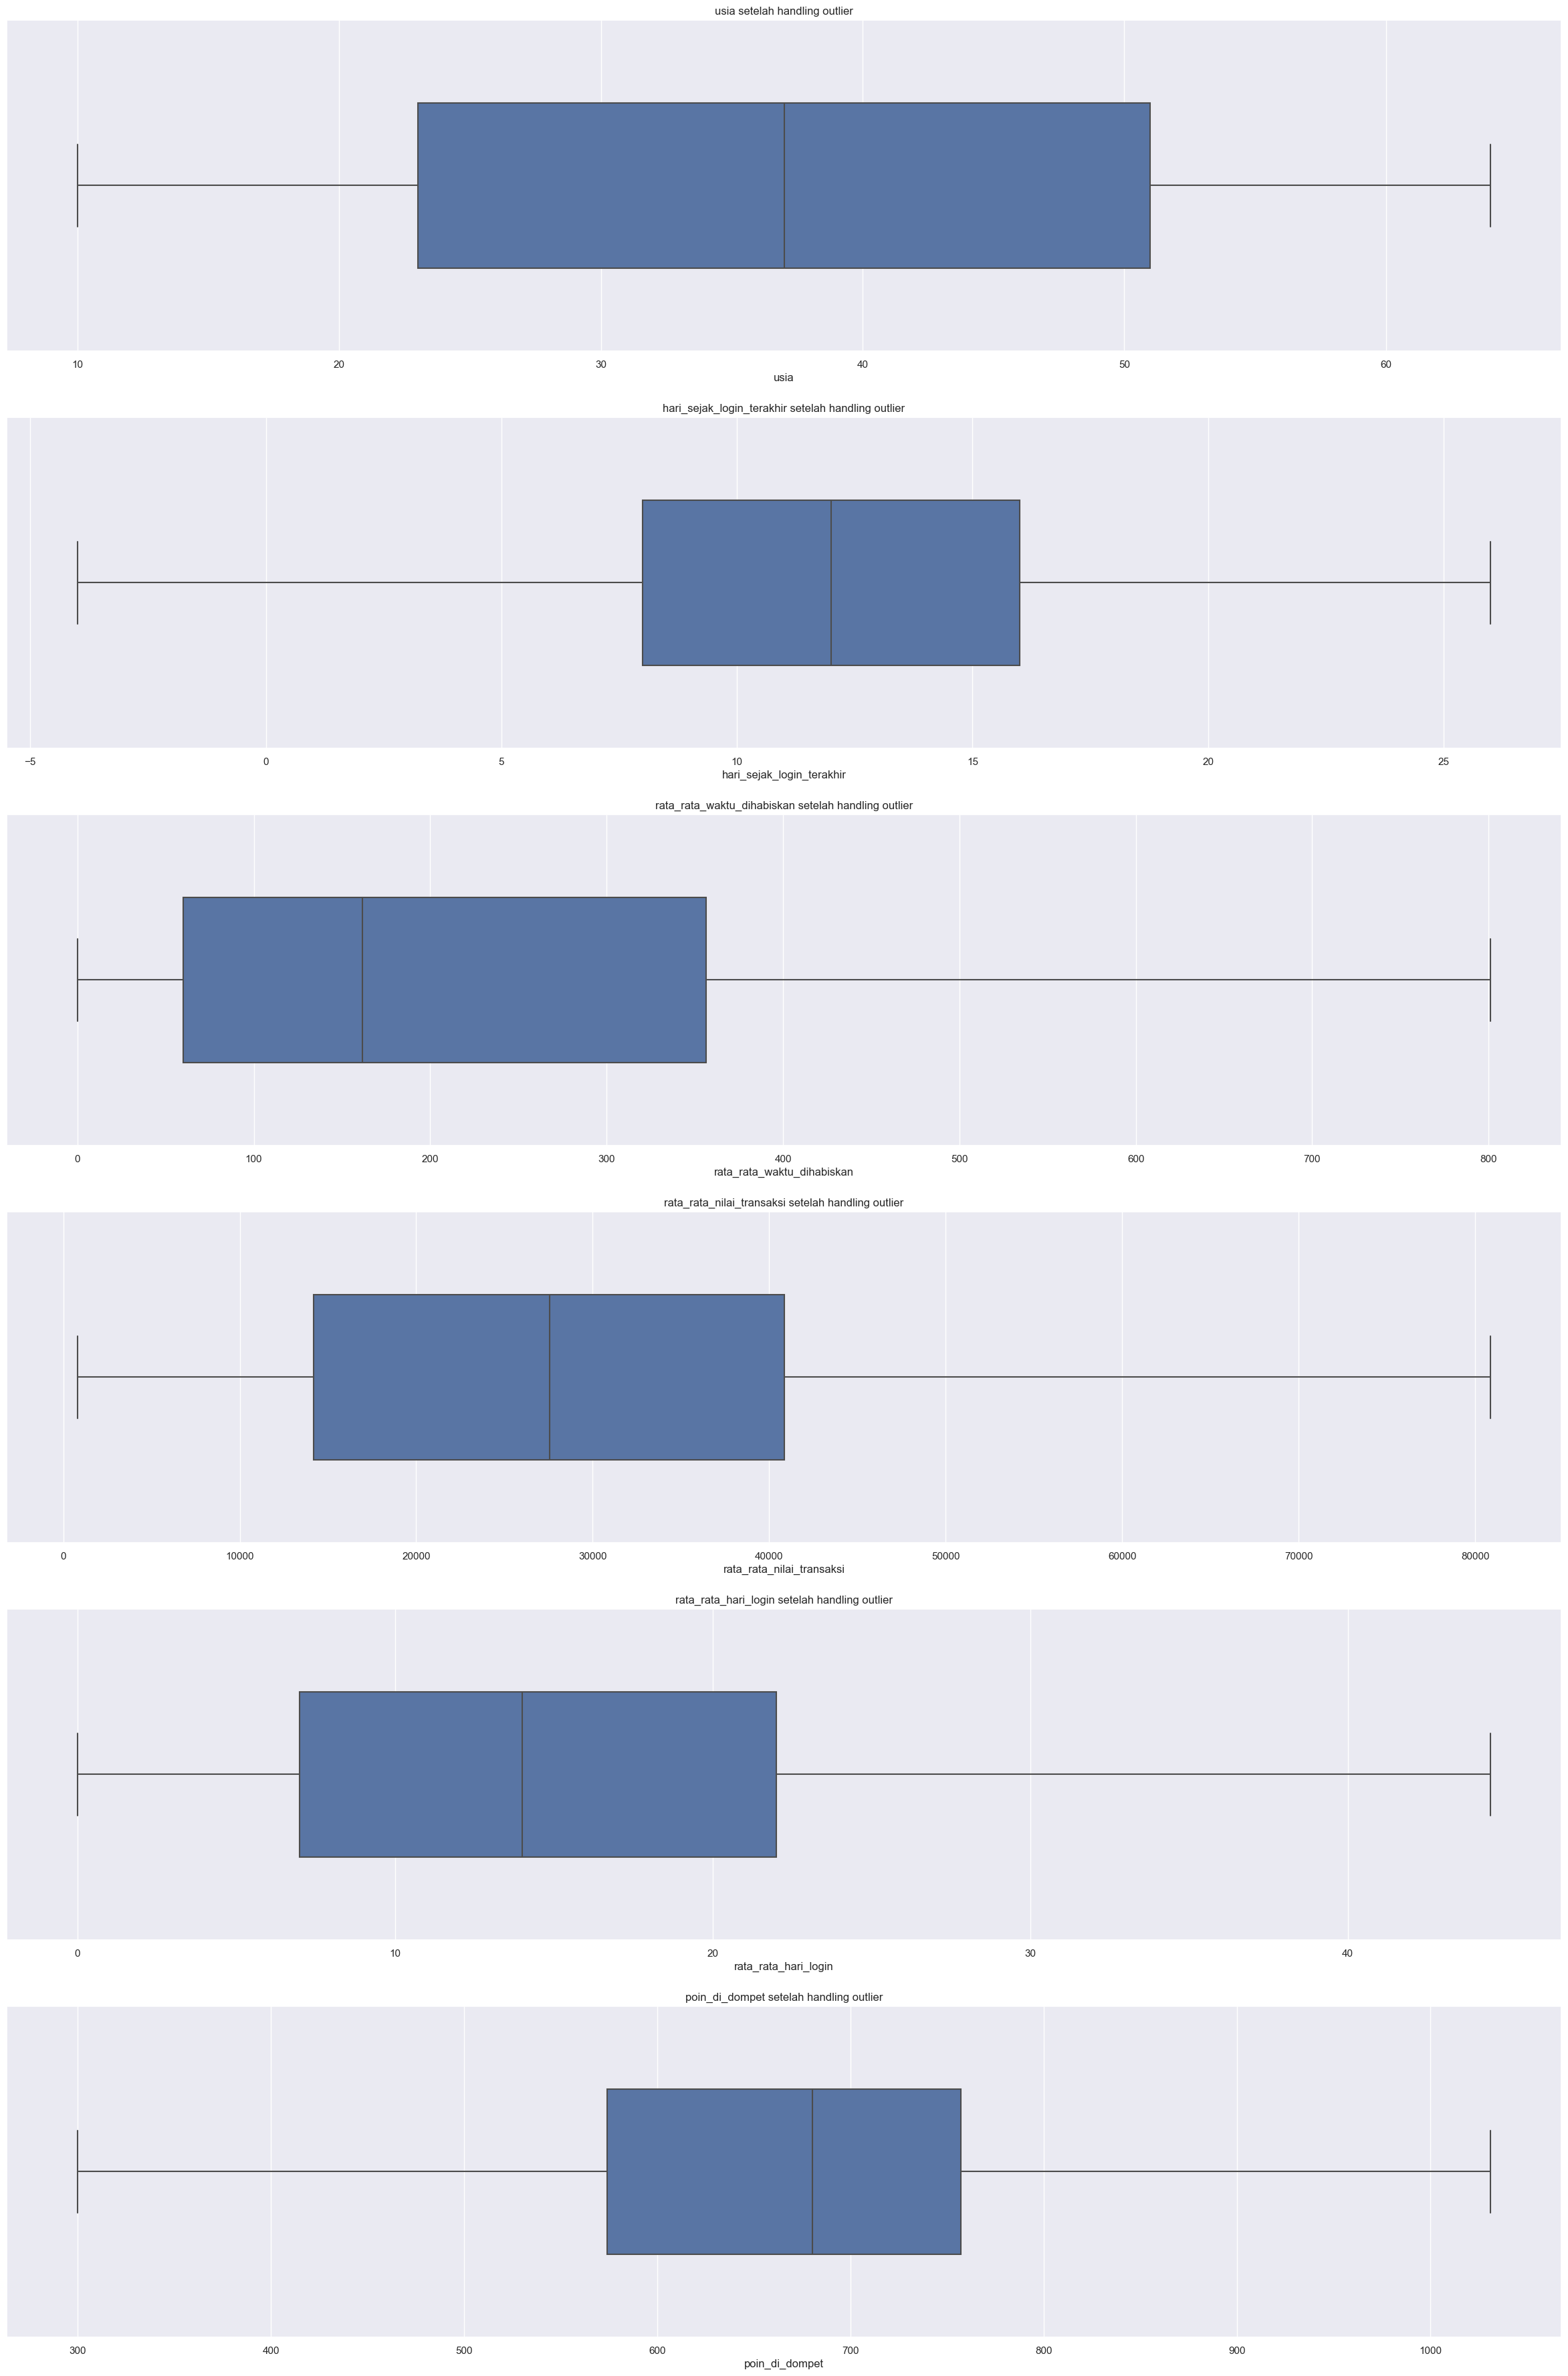

In [25]:
# kita cek lagi outliernya

num = df_num
n=len(num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,1,figsize=(30,45))

for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i],data=df,x=df[col],width=0.50)
    ax[i].set_title(f'{col} setelah handling outlier')

### EDA Before Feature Selection

### Analisis Univariate
EDA supaya kita tahu insight atau juga dapat lebih memahami ssecara mendalam mengenai data yang digunakan seperti distribusi, pola, dan lain-lain. Dengan membandingkan beberapa data dari fitur independen terhadap target atau fitur dependen.

In [26]:
eda = df.copy()
eda

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik,churn_risk_score
0,9f420209e7d129f3,29,F,Unknown,No Membership,4/5/2017,Yes,Without Offers,Unknown,Wi-Fi,...,801.13375,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,Unknown,Basic Membership,3/31/2017,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2/11/2017,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,...,235.14000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,12/23/2015,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,3/20/2015,Unknown,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,3/5/2015,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,...,199.33000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,1/15/2017,Yes,Without Offers,Desktop,Wi-Fi,...,368.50000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,Unknown,Gold Membership,7/11/2015,Yes,Without Offers,Unknown,Mobile_Data,...,272.13000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,5/25/2016,Yes,Without Offers,Desktop,Wi-Fi,...,65.07000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [27]:
eda.columns

Index(['user_id', 'usia', 'jenis_kelamin', 'kategori_wilayah',
       'kategori_membership', 'tanggal_bergabung',
       'bergabung_melalui_referral', 'jenis_penawaran_preferensi',
       'medium_operasi', 'pilihan_internet', 'waktu_kunjungan_terakhir',
       'hari_sejak_login_terakhir', 'rata_rata_waktu_dihabiskan',
       'rata_rata_nilai_transaksi', 'rata_rata_hari_login', 'poin_di_dompet',
       'menggunakan_diskon_khusus', 'preferensi_aplikasi_penawaran',
       'keluhan_terdahulu', 'status_keluhan', 'umpan_balik',
       'churn_risk_score'],
      dtype='object')

In [28]:
membership = eda.groupby(['churn_risk_score', 'kategori_membership']).aggregate(Jumlah_pelanggan=('kategori_membership', 'count')).reset_index()

In [29]:
membership

,churn_risk_score,kategori_membership,Jumlah_pelanggan
0,0,Basic Membership,251
1,0,Gold Membership,4282
2,0,No Membership,226
3,0,Platinum Membership,4338
4,0,Premium Membership,4455
5,0,Silver Membership,3428
6,1,Basic Membership,7473
7,1,Gold Membership,2513
8,1,No Membership,7466
9,1,Silver Membership,2560


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

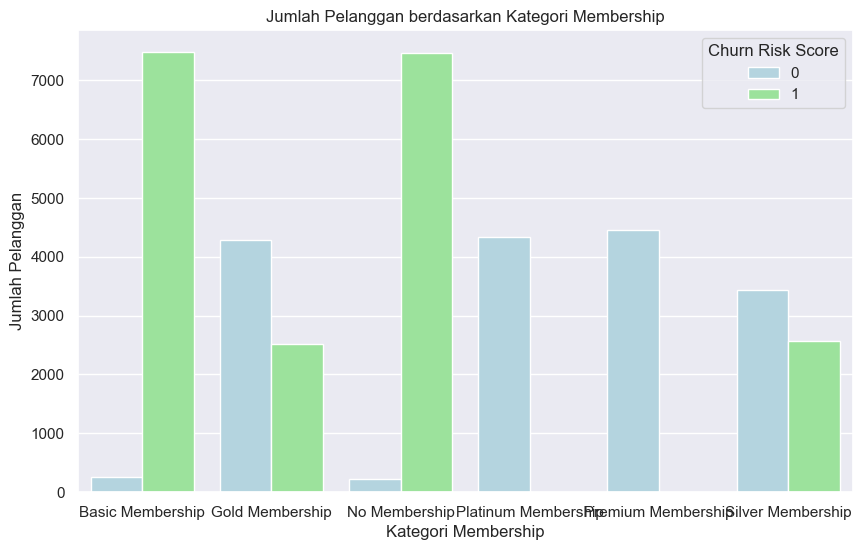

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=membership,
            x='kategori_membership',
            y='Jumlah_pelanggan',
            hue='churn_risk_score', 
            palette=['lightblue', 'lightgreen'])

plt.title('Jumlah Pelanggan berdasarkan Kategori Membership')
plt.xlabel('Kategori Membership')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn Risk Score')
plt.show()

Pelanggan dengan kategori membership basic dan tidak menggunkan membership itu cenderung tidak loyal atau churn. Terdapat beberapa kemungkinan dari asumsi saya:
- mungkin aja dia tidak tertarik dengan membership atau produk
- tidak mempunyai uang lebih untuk mengupgrade membership

In [31]:
rata_transaksi = eda.groupby(['churn_risk_score']).aggregate(rata2_transaksi=('rata_rata_nilai_transaksi', 'mean')).reset_index()
rata_transaksi

,churn_risk_score,rata2_transaksi
0,0,33252.364459
1,1,25366.363813


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

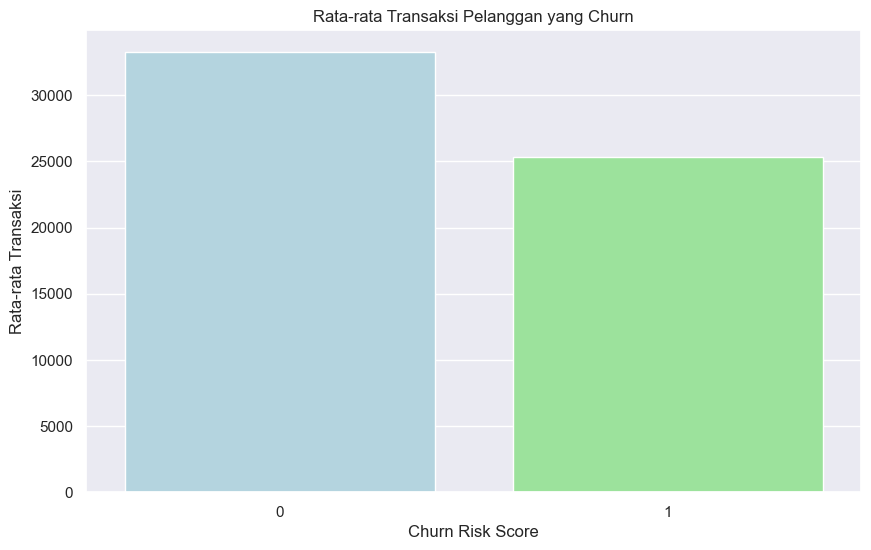

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rata_transaksi,
            x='churn_risk_score',
            y='rata2_transaksi', 
            palette=['lightblue', 'lightgreen'])

plt.title('Rata-rata Transaksi Pelanggan yang Churn')
plt.xlabel('Churn Risk Score')
plt.ylabel('Rata-rata Transaksi')
plt.show()

Pelanggan yang tidak loyal atau churn cenderung memiliki atau membeli produk dengan jumlah rata-rata transaksi yang lebih kecil dibandingkan dengan pelanggan loyal yang lebih banyak transaksinya.
- pelanggan yang tidak loyal cenderung menggunakan produk perusahaan lebih sedikit

In [33]:
dompet = eda.groupby(['churn_risk_score']).aggregate(sisa_dompet=('poin_di_dompet', 'mean')).reset_index()
dompet

,churn_risk_score,sisa_dompet
0,0,702.781587
1,1,603.716205


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

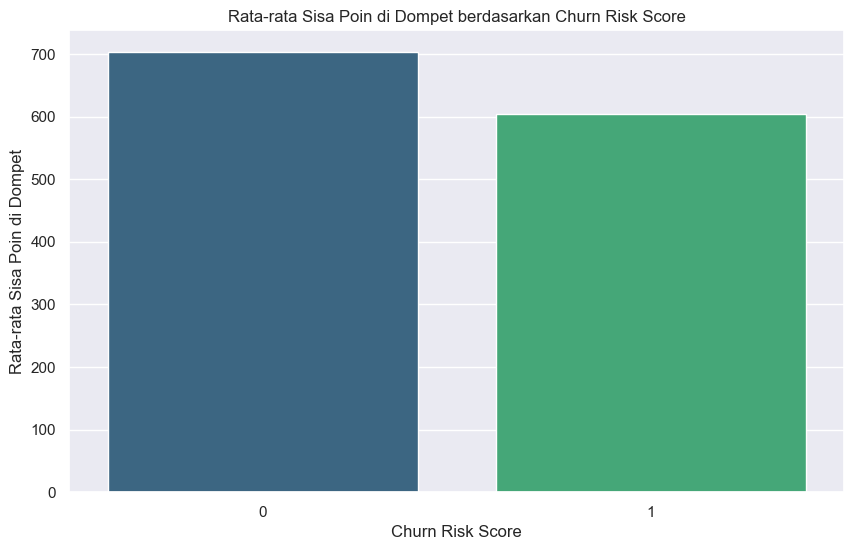

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dompet,
            x='churn_risk_score',
            y='sisa_dompet',
            palette='viridis')

plt.title('Rata-rata Sisa Poin di Dompet berdasarkan Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Rata-rata Sisa Poin di Dompet')
plt.show()

Pelanggan dengan nilai poin atau uang sisa di dompet yang sedikit itu cenderung merpakan pelanggan yang tidak loyal atau churn. Hal ini masih sebuah kemungkinan karena hasil rata-rata dari pelanggan menunjukkan hal tersebut.

In [35]:
pengaduan = eda.groupby(['churn_risk_score','umpan_balik']).aggregate(jumlah_pelanggan=('umpan_balik', 'count')).reset_index()
pengaduan

,churn_risk_score,umpan_balik,jumlah_pelanggan
0,0,No reason specified,2296
1,0,Poor Customer Service,2260
2,0,Poor Product Quality,2223
3,0,Poor Website,2309
4,0,Products always in Stock,1382
5,0,Quality Customer Care,1360
6,0,Reasonable Price,1417
7,0,Too many ads,2342
8,0,User Friendly Website,1391
9,1,No reason specified,3994


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

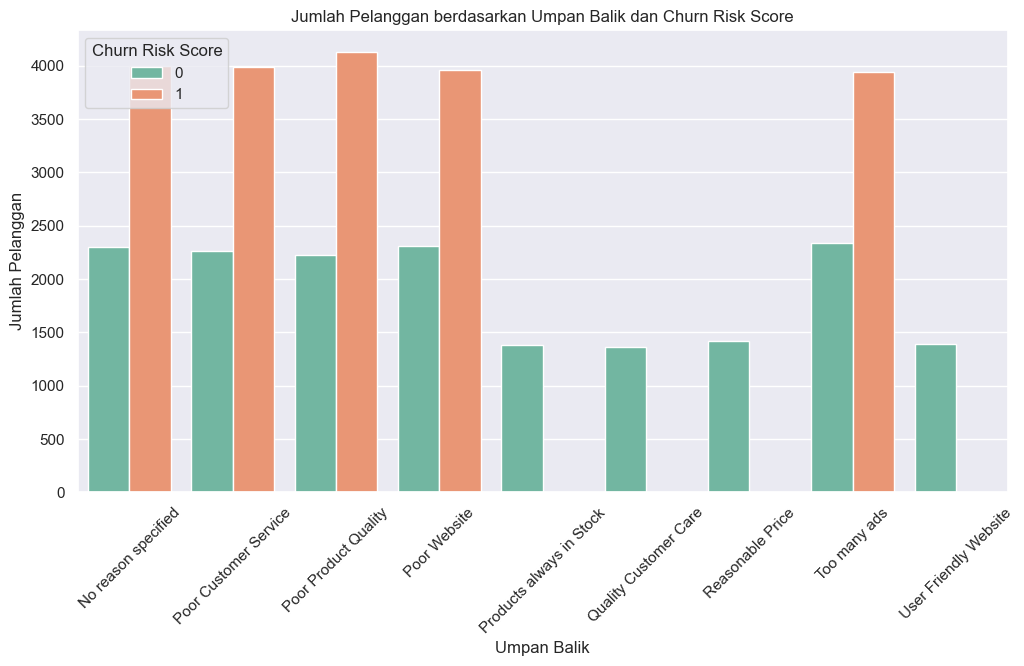

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=pengaduan,
            x='umpan_balik',
            y='jumlah_pelanggan',
            hue='churn_risk_score',
            palette='Set2')

plt.title('Jumlah Pelanggan berdasarkan Umpan Balik dan Churn Risk Score')
plt.xlabel('Umpan Balik')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn Risk Score')
plt.xticks(rotation=45)
plt.show()

Pelanggan yang sering mengajukan pengaduan mengenai 'poor product quality', atau produk yang dibeli itu kualitasnya kurang bagus, merupakan pelanggan yang cenderung tidak loyal. Hal ini kemungkinan disebabkan oleh ketidaknyamanan yang dirasakan oleh pelanggan terhadap produk yang digunakan, hal ini dapat disebabkan oleh beberapa faktor di lapangan. Sehingga diperlukan tindakan lebih lanjut.

Namun tidak menutup kemungkinan juga bahwa banyak pelanggan yang tidak loyak dikarenakan terlalu sering iklan muncul pada website/produk kita.

### Encoding and then Korelasi

In [37]:
num_columns_eda = df_copy.select_dtypes(include=np.number).columns.tolist() #jadi list arr
num_columns_eda

<IPython.core.display.Javascript object>

['usia',
 'hari_sejak_login_terakhir',
 'rata_rata_waktu_dihabiskan',
 'rata_rata_nilai_transaksi',
 'rata_rata_hari_login',
 'poin_di_dompet',
 'churn_risk_score']

In [38]:
kat_columns

['user_id',
 'jenis_kelamin',
 'kategori_wilayah',
 'kategori_membership',
 'tanggal_bergabung',
 'bergabung_melalui_referral',
 'jenis_penawaran_preferensi',
 'medium_operasi',
 'pilihan_internet',
 'waktu_kunjungan_terakhir',
 'menggunakan_diskon_khusus',
 'preferensi_aplikasi_penawaran',
 'keluhan_terdahulu',
 'status_keluhan',
 'umpan_balik']

In [39]:
df[kat_columns]

,user_id,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,waktu_kunjungan_terakhir,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik
0,9f420209e7d129f3,F,Unknown,No Membership,4/5/2017,Yes,Without Offers,Unknown,Wi-Fi,22:29:49,Yes,Yes,Yes,No Information Available,Poor Website
1,ac6e97806267549e,M,Unknown,Basic Membership,3/31/2017,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,Yes,No,Yes,No Information Available,Poor Customer Service
2,a6aa19b1580eed4e,F,City,Silver Membership,2/11/2017,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,20:31:53,Yes,No,Yes,No Information Available,Too many ads
3,aeee343277211c2f,F,Village,No Membership,12/23/2015,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,No,Yes,No,Not Applicable,Too many ads
4,82448b5c8ce6390c,M,Town,Silver Membership,3/20/2015,Unknown,Gift Vouchers/Coupons,Smartphone,Wi-Fi,4:16:48,Yes,No,No,Not Applicable,Poor Product Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,M,Town,Gold Membership,3/5/2015,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,9:32:50,Yes,Yes,No,Not Applicable,User Friendly Website
37006,90e22286ac0acf04,F,City,Gold Membership,1/15/2017,Yes,Without Offers,Desktop,Wi-Fi,2:28:52,No,Yes,No,Not Applicable,Reasonable Price
37007,9329a6297407334a,M,Unknown,Gold Membership,7/11/2015,Yes,Without Offers,Unknown,Mobile_Data,17:50:38,Yes,Yes,Yes,Solved,Poor Customer Service
37008,a4403ddda8fcf9f3,F,City,Gold Membership,5/25/2016,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,No,Yes,No,Not Applicable,Poor Website


### Encoding Sementara hanya untuk Visualisasi Korelasi
Dari semua fitur kategorikal tersebut, hampir semua fitur tersebut merupakan tipe data kategorikal yang ordinal. Sehingga teknik encoding atau mengubah data teks menjadi numerik yang cocok adalah Ordinal encoding atau Label Encoding. Namun kita ketahui bahwa ada dua fitur waktu namun tipe datanya object. Perlu dipertimbangkan apakah fitur tersebut akan dilakukan encoding atau tidak.

Selain itu perhatikan juga bahwa disini kita udah punya 15 kolom. Jika ingin menerapkan encoding seperti one hot encoding itu harus hati-hati supaya datanya tidak terlalu bervariasi sehingga membuat model underfit.

In [40]:
df_corr = df.copy()

In [41]:
df_corr.head(5)

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik,churn_risk_score
0,9f420209e7d129f3,29,F,Unknown,No Membership,4/5/2017,Yes,Without Offers,Unknown,Wi-Fi,...,801.13375,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,Unknown,Basic Membership,3/31/2017,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2/11/2017,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,...,235.14000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,12/23/2015,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,3/20/2015,Unknown,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [42]:
m_labelencoder = LabelEncoder()

In [43]:
for col in df_corr[kat_columns]:
    df_corr[col] = m_labelencoder.fit_transform(df_corr[col])
    
df_corr.head(10)

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik,churn_risk_score
0,18050,29,0,2,2,624,2,3,3,2,...,801.13375,38604.690,10.0,627.48000,1,1,1,0,3,1
1,25711,50,1,2,0,528,2,3,1,0,...,338.15000,7665.660,17.0,575.97000,1,0,1,0,1,1
2,22381,26,0,0,5,377,1,0,3,0,...,235.14000,37671.690,5.0,767.93000,1,0,1,0,7,0
3,27174,63,0,3,2,321,0,0,1,0,...,56.67000,15678.140,11.0,590.22000,0,1,0,1,7,1
4,1301,64,1,1,5,490,1,1,2,2,...,153.99000,8422.680,0.0,722.04000,1,0,0,1,2,0
5,13263,35,1,1,4,935,0,0,3,2,...,801.13375,29664.010,28.0,782.49000,0,1,1,4,2,0
6,21525,43,1,2,1,546,2,1,2,1,...,416.30000,13160.390,24.0,712.94000,1,0,0,1,0,1
7,12052,15,1,0,2,1013,0,0,2,2,...,34.07000,9151.140,29.0,655.43000,1,0,0,1,0,1
8,3360,49,1,1,3,597,2,3,3,0,...,650.12000,80871.465,11.0,299.83375,1,1,0,1,4,0
9,5852,35,0,1,0,277,2,0,1,1,...,106.23000,28232.590,16.0,984.93392,0,1,0,1,7,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

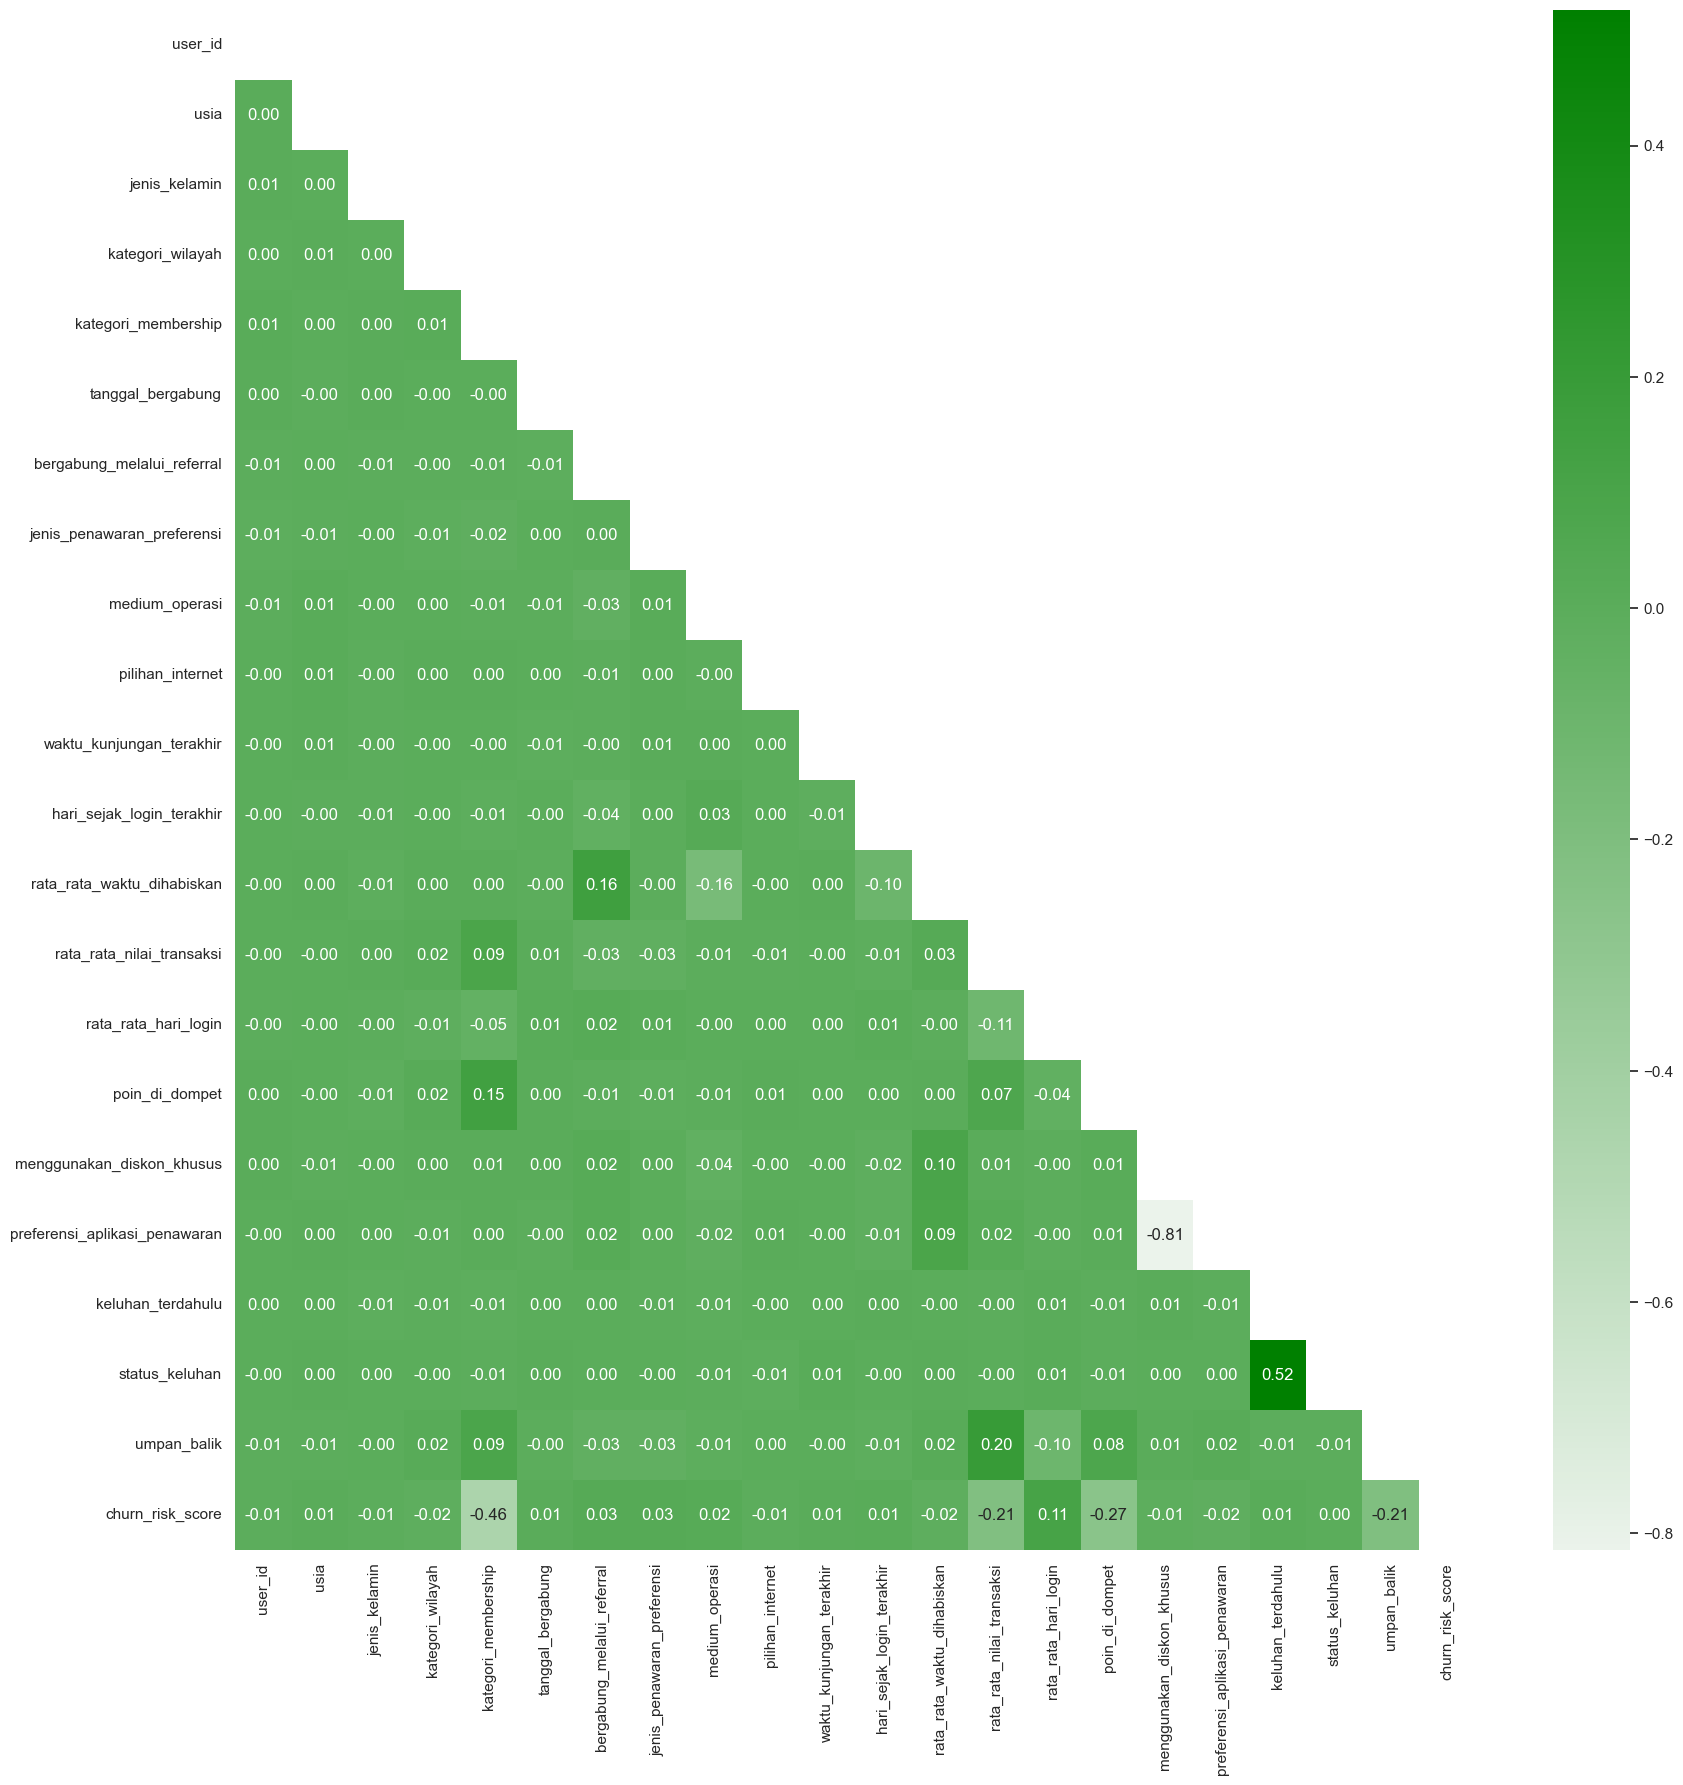

In [44]:
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.set_style("white")
cmap = sns.light_palette("green", as_cmap=True)

mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

sns.heatmap(df_corr.corr(),
            annot=True,
            cmap=cmap,
            fmt='.2f',
            mask=mask)

plt.show()

Sepertinya cukup banyak fitur yang berkolerasi baik dengan variabel target kita yaitu 'churn_risk_score':
- kategori_membership
- poin_di_dompet
- rata_rata_nilai_transaksi
- umpan_balik
- rata_rata_hari_login
- bergabung_melalui_referral
- jenis_penawaran_preferensi
- medium_operasi
- kategori_wilayah
- preferensi_aplikasi_penawaran

In [56]:
data_corr = df_corr.copy()
data_corr_x = data_corr.drop(columns=['churn_risk_score'])
data_corr_x.head(2)

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,hari_sejak_login_terakhir,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik
0,18050,29,0,2,2,624,2,3,3,2,...,4,801.13375,38604.69,10.0,627.48,1,1,1,0,3
1,25711,50,1,2,0,528,2,3,1,0,...,11,338.15000,7665.66,17.0,575.97,1,0,1,0,1


In [57]:
data = df.copy()
data.head(2)

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik,churn_risk_score
0,9f420209e7d129f3,29,F,Unknown,No Membership,4/5/2017,Yes,Without Offers,Unknown,Wi-Fi,...,801.13375,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,Unknown,Basic Membership,3/31/2017,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


#### Memisah data independen dan data dependen

In [58]:
X = data.drop(['churn_risk_score'],axis=1)
y = pd.DataFrame(data['churn_risk_score'])

<IPython.core.display.Javascript object>

In [59]:
X.head(5)

,user_id,usia,jenis_kelamin,kategori_wilayah,kategori_membership,tanggal_bergabung,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,pilihan_internet,...,hari_sejak_login_terakhir,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,keluhan_terdahulu,status_keluhan,umpan_balik
0,9f420209e7d129f3,29,F,Unknown,No Membership,4/5/2017,Yes,Without Offers,Unknown,Wi-Fi,...,4,801.13375,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website
1,ac6e97806267549e,50,M,Unknown,Basic Membership,3/31/2017,Yes,Without Offers,Desktop,Fiber_Optic,...,11,338.15000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2/11/2017,Unknown,Credit/Debit Card Offers,Unknown,Fiber_Optic,...,8,235.14000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads
3,aeee343277211c2f,63,F,Village,No Membership,12/23/2015,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,10,56.67000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads
4,82448b5c8ce6390c,64,M,Town,Silver Membership,3/20/2015,Unknown,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,9,153.99000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality


In [60]:
X.shape

(36992, 21)

In [61]:
y.shape

(36992, 1)

### Feature Selection terhadap X
dengan menggunakan si data_corr untuk nemuin si fitur. Dan hapus fitur yang gak dipakai pada X yang menggunakan data

#### 10 fitur yang memiliki nilai p < 0.05.
ingin memilih fitur-fitur yang memberikan bukti statistik yang cukup kuat untuk menolak hipotesis nol bahwa tidak ada hubungan antara fitur tersebut dengan target yang diuji. 

In [62]:
selector = SelectKBest(score_func=f_classif, k=10)
selector = selector.fit(data_corr_x, y)

df_scores = pd.DataFrame({'Feature': data_corr_x.columns,
                         'Score': selector.scores_,
                         'p-value': (selector.pvalues_).round(4)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

<IPython.core.display.Javascript object>

,Feature,Score,p-value
4,kategori_membership,9766.534451,0.0000
15,poin_di_dompet,2803.934876,0.0000
13,rata_rata_nilai_transaksi,1733.190698,0.0000
20,umpan_balik,1668.048202,0.0000
14,rata_rata_hari_login,489.754213,0.0000
6,bergabung_melalui_referral,41.085513,0.0000
7,jenis_penawaran_preferensi,36.534376,0.0000
8,medium_operasi,13.132955,0.0003
17,preferensi_aplikasi_penawaran,12.980007,0.0003
3,kategori_wilayah,10.378749,0.0013


Disini aku memutuskan untuk menggunakan fitur untuk modeling nanti dengan nilai p-value yang lebih kecil dari 0.05. Dan sepertinya pada top 10 fitur tersebut, cukup baik dari segi p-value dan Score yang didapt dari hasil selector.

Memang benar ada beberapa fitur yang kualifikasi untuk < 0,05. Namun kita lihat dari Score yang semakin kebawah juga semakin menurun.

#### Data sangat berharga !!
Tapi disini aku bakal pake fitur atau varianbel yang memang memiliki nilai p-value lebih kecil dari 0,05. Dikarenakan data itu sangat berharga. Sisanya akan dihapus

In [63]:
# kita akan hapus kolom yang tidak kita gunakan
hapus = ['hari_sejak_login_terakhir',
         'keluhan_terdahulu',
         'pilihan_internet',
         'tanggal_bergabung',
         'waktu_kunjungan_terakhir',
         'usia',
         'jenis_kelamin',
         'user_id',
         'status_keluhan']

In [64]:
# terapin
X = X.drop(hapus, axis=1).sort_index()
X

,kategori_wilayah,kategori_membership,bergabung_melalui_referral,jenis_penawaran_preferensi,medium_operasi,rata_rata_waktu_dihabiskan,rata_rata_nilai_transaksi,rata_rata_hari_login,poin_di_dompet,menggunakan_diskon_khusus,preferensi_aplikasi_penawaran,umpan_balik
0,Unknown,No Membership,Yes,Without Offers,Unknown,801.13375,38604.69,10.0,627.48,Yes,Yes,Poor Website
1,Unknown,Basic Membership,Yes,Without Offers,Desktop,338.15000,7665.66,17.0,575.97,Yes,No,Poor Customer Service
2,City,Silver Membership,Unknown,Credit/Debit Card Offers,Unknown,235.14000,37671.69,5.0,767.93,Yes,No,Too many ads
3,Village,No Membership,No,Credit/Debit Card Offers,Desktop,56.67000,15678.14,11.0,590.22,No,Yes,Too many ads
4,Town,Silver Membership,Unknown,Gift Vouchers/Coupons,Smartphone,153.99000,8422.68,0.0,722.04,Yes,No,Poor Product Quality
...,...,...,...,...,...,...,...,...,...,...,...,...
37005,Town,Gold Membership,Unknown,Credit/Debit Card Offers,Unknown,199.33000,29455.29,9.0,846.52,Yes,Yes,User Friendly Website
37006,City,Gold Membership,Yes,Without Offers,Desktop,368.50000,27038.47,8.0,835.98,No,Yes,Reasonable Price
37007,Unknown,Gold Membership,Yes,Without Offers,Unknown,272.13000,39305.35,27.0,714.90,Yes,Yes,Poor Customer Service
37008,City,Gold Membership,Yes,Without Offers,Desktop,65.07000,46108.73,6.0,744.99,No,Yes,Poor Website


#### hampir lupa kita harus cek untuk target kita juga, apakah perlu encoding atau tidak.

In [65]:
y.dtypes

churn_risk_score    int64
dtype: object

### Encoding: Ordinal Encoder
untuk kolom kategorikal di mana data perlu diurutkan.

In [66]:
t_ordinal = OrdinalEncoder()

In [67]:
encode_target = y.copy()
t_ordinal.fit(encode_target[['churn_risk_score']])
encode_target[['churn_risk_score']] = t_ordinal.transform(encode_target[['churn_risk_score']])
encode_target = encode_target['churn_risk_score']

y = pd.DataFrame(encode_target).sort_index()
y

<IPython.core.display.Javascript object>

,churn_risk_score
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
37005,0.0
37006,0.0
37007,0.0
37008,0.0


In [68]:
X.to_csv('C:/Users/ASUS/kode/Projek/E-Commerce Customer Churn Prediction/X.csv', index=False)
y.to_csv('C:/Users/ASUS/kode/Projek/E-Commerce Customer Churn Prediction/y.csv', index=False)